# Group By Exercise

**This exercise uses the `laliga.csv` dataset**

## Part 1

In [ ]:
#Find the 5 teams that had the most "Red Cards"
import pandas as pd
import matplotlib.pyplot as mplt

df = pd.read_csv("laliga.csv")
df.groupby(by=["Team"]).agg({"Red Cards": "sum"}).sort_values("Red Cards", ascending=False).head(5)
# OR
df.groupby(by=["Team"])["Red Cards"].sum().nlargest(5)

Team
Rayo Vallecano    8
Levante UD        7
Getafe CF         6
RC Celta          6
Real Madrid       6
Name: Red Cards, dtype: int64

In [ ]:
# Find the average number of "Long passes" made by each Position (Goalkeeper, Forward, etc.)
df.groupby(by=["Position"]).agg({"Long passes": "mean"})
# OR
df.groupby(by=["Position"])["Long passes"].mean()

Position
Defender      102.610811
Forward        23.787234
Goalkeeper    242.157895
Midfielder     60.445455
Name: Long passes, dtype: float64

In [ ]:
#Find the 10 Shirt numbers that scored the most goals
df.groupby(by=["Shirt number"]).agg({"Goals scored": "sum"}).sort_values("Goals scored", ascending=False).head(10)
# OR
df.groupby(by=["Shirt number"])["Goals scored"].sum().nlargest(10)

Shirt number
9.0     169
10.0    117
7.0     101
19.0     69
11.0     56
22.0     47
12.0     45
17.0     38
23.0     27
8.0      23
Name: Goals scored, dtype: int64

## Part 2

**Use `agg` to create a dataframe that contains:**
* A `total` column containing the total "Shots" taken by each team
* A `on_target` column containing the total "Shots on target" taken by each team
* It should look like the following dataframe (but for all teams in the dataset):

| Team   | total | on_target |
| ----------- | ----------- | ----------- |
| **Real Betis** | 300      |158
| **Levante UD** | 314      |157

In [ ]:
new_df = df.groupby(by=["Team"]).agg(total=("Shots", "sum"), on_target=("Shots on target", "sum"))
new_df

,total,on_target
Team,,
Athletic Club,332,151
Atlético de Madrid,339,159
CD Leganés,334,132
D. Alavés,299,109
FC Barcelona,445,249
Getafe CF,283,121
Girona FC,324,147
Levante UD,314,157
R. Valladolid CF,319,131


Use the dataframe from above to create the following figure:

* Notice the layout (2 rows by 1 column)
* The top chart shows the top 5 most accurate teams (highest on-target shot pecentage)
* The bottom chart shows the 5 least accurate teams (lowest on-target shot pecentage)
* Both plots share the same x-axis
* Notice how the data is sorted within each plot!


![shot_accuracy.png](attachment:shot_accuracy.png)

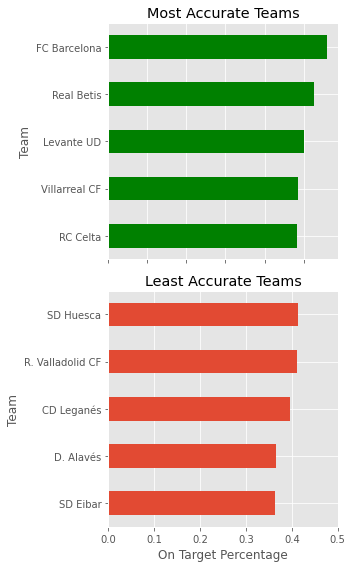

In [ ]:
mplt.style.use("ggplot")
new_df["on-target shot percentage"] = new_df["on_target"] / new_df["total"]

mplt.figure(figsize=(5, 8))
mplt.subplot(2, 1, 1)
new_df["on-target shot percentage"].sort_values().tail(5).plot(kind="barh", color="green")
mplt.xlabel("Team")
mplt.title("Most Accurate Teams")

mplt.subplot(2, 1, 2)
new_df["on-target shot percentage"].sort_values().head(5).plot(kind="barh", sharex=True)
mplt.xlabel("On Target Percentage")
mplt.title("Least Accurate Teams")
mplt.xlim(0.0, 0.5)

mplt.tight_layout()
mplt.show()

In [1]:
import seaborn as sb
sb.set_theme(palette="sokdjf")

ValueError: ignored